In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

%matplotlib inline

In [2]:
size_Y = 7
size_X = 7
rpn_stride = 8

scales = [2,4,8]
rations = [0.5,1,2]

In [3]:
def anchor_gen(size_X,size_Y,rpn_stride,scales,rations):
    scales , rations = np.meshgrid( scales , rations )
    scales , rations = scales.flatten() , rations.flatten()
    scaleY = scales * np.sqrt(rations)
    scaleX = scales / np.sqrt(rations)
    #---------------------------------
    '''
    X * Y = scales^2
    X / Y = rations
    scales是面积关系，rations是X Y比值。
    解得如上关系。
    可以保证同种尺寸的面积一致。
    '''
    #--------------------------------

    shiftX = np.arange(0,size_X) * rpn_stride
    shiftY = np.arange(0,size_Y) * rpn_stride
    shiftX,shiftY = np.meshgrid(shiftX,shiftY)
    centerX,anchorX = np.meshgrid(shiftX,scaleX)
    centerY,anchorY = np.meshgrid(shiftY,scaleY)
    anchor_center = np.stack([centerY,centerX],axis = 2).reshape(-1,2)
    anchor_size = np.stack([anchorY,anchorX],axis = 2).reshape(-1,2)
    boxes = np.concatenate([anchor_center - 0.5*anchor_size,anchor_center + 0.5*anchor_size],axis = 1)
    return boxes


In [4]:
anchors = anchor_gen(size_X,size_Y,rpn_stride,scales,rations)
anchors.shape

(441, 4)

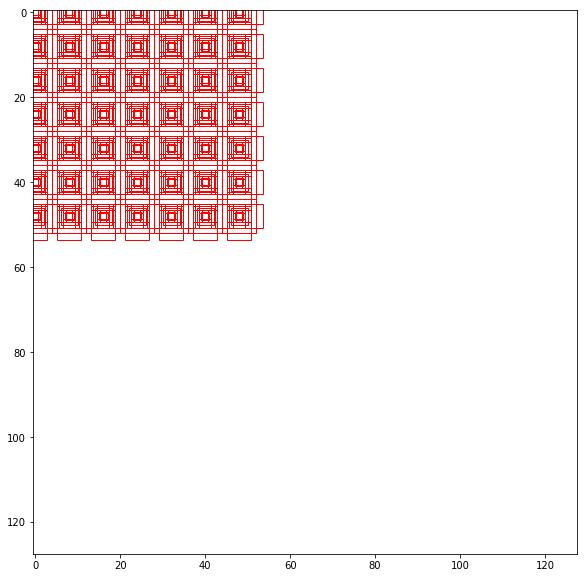

In [5]:
plt.figure(figsize=(10,10))
img = cv2.resize(img,())
plt.imshow(img)
Axs = plt.gca()#get current Axs

for i in range(anchors.shape[0]):
    box = anchors[i]
    rec = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor = 'r',facecolor='none')
    Axs.add_patch(rec)


In [6]:
    scales , rations = np.meshgrid( scales , rations )
    scales , rations = scales.flatten() , rations.flatten()
    scaleY = scales * np.sqrt(rations)
    scaleX = scales / np.sqrt(rations)
    #---------------------------------
    '''
    X * Y = scales^2
    X / Y = rations
    scales是面积关系，rations是X Y比值。
    解得如上关系。
    可以保证同种尺寸的面积一致。
    '''
    #--------------------------------

    shiftX = np.arange(0,size_X) * rpn_stride
    shiftY = np.arange(0,size_Y) * rpn_stride
    shiftX,shiftY = np.meshgrid(shiftX,shiftY)
    centerX,anchorX = np.meshgrid(shiftX,scaleX)
    centerY,anchorY = np.meshgrid(shiftY,scaleY)
    anchor_center = np.stack([centerY,centerX],axis = 2).reshape(-1,2)
    anchor_size = np.stack([anchorY,anchorX],axis = 2).reshape(-1,2)

In [7]:
anchor_center.shape

(441, 2)

In [39]:
a = np.array([[1,2,3],[3,4,4]])
b = np.array([[1,2,3],[3,4,5],[5,6,7]])

In [40]:
b

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [41]:
c = np.split(a,[1],axis=1)
c

[array([[1],
        [3]]), array([[2, 3],
        [4, 4]])]

In [48]:
np.split(b,(1,2),axis=1)

[array([[1],
        [3],
        [5]]), array([[2],
        [4],
        [6]]), array([[3],
        [5],
        [7]])]

## 